# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах.   
Характеристики для каждой скважины в регионе уже известны.     
- Необходимо построить  модель для определения региона, где добыча принесёт наибольшую прибыль. 
- Необходимо проанализировать возможную прибыль и риски техникой *Bootstrap.*



In [1]:
#подключить гугл диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_profiling


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from numpy.random import RandomState



## Загрузка и подготовка данных

### Чтение данных и анализ

In [3]:
#читаем файлы
data_0 = pd.read_csv('/content/drive/MyDrive/DS/geo_data_0.csv')
data_1 = pd.read_csv('/content/drive/MyDrive/DS/geo_data_1.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/DS/geo_data_2.csv')

In [4]:
# просмотрим все данные(последовательно)
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.head()
data_1.head()
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Во всех 3х датасетов пропусков нет, тип данных верный. Готовы к работе.   
     
Посмотрим корреляции

In [6]:
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [7]:
data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [8]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Больше всего  с таргетом коррелирует f2    
      
Смотрим распределение данных  на гистограммах   

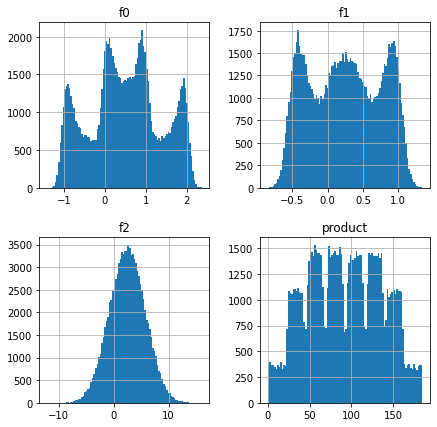

In [9]:
data_0.hist(bins=100, figsize=(7,7))
plt.show()

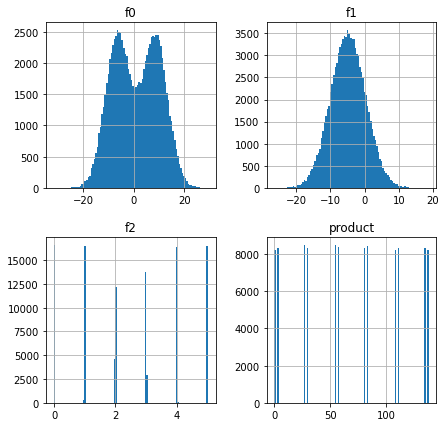

In [10]:
data_1.hist(bins=100, figsize=(7,7))
plt.show()

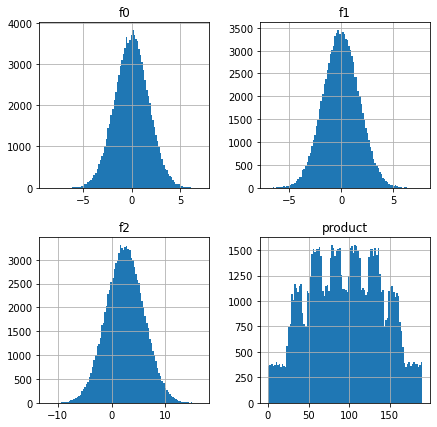

In [11]:
data_2.hist(bins=100, figsize=(7,7))
plt.show()

Распределения некоторые нормльные , некотрые выглядят как несколько нормальных наложеных друг на друга.    
ЧТо от не так с data_1  f2 и product.
    
  

### Разбираемся с данными ,котрые выглядят плохо (data_1 ['f2','product'] )

Посмотрим данные, используя describe()  

In [12]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


describe()  ничего плохого не видно , в трех дата сетах все примерно одинаково...     
Но почему же тогда в data1  f2 & product  так выглядят на гистограмме ??  
       
Посомтрим кол-во уникальных значений через  nunique()       

In [15]:
# кол-во уникальных значений для 3х дата сетов для 'product'
print ("data_0['product'].nunique() = " , data_0['product'].nunique())
print ("data_1['product'].nunique() = " , data_1['product'].nunique())
print ("data_2['product'].nunique() = " , data_2['product'].nunique())

data_0['product'].nunique() =  100000
data_1['product'].nunique() =  12
data_2['product'].nunique() =  100000


In [16]:
# кол-во уникальных значений для 3х дата сетов для 'f2'
print ("data_0['f2'].nunique() = " , data_0['f2'].nunique())
print ("data_1['f2'].nunique() = " , data_1['f2'].nunique())
print ("data_2['f2'].nunique() = " , data_2['f2'].nunique())

data_0['f2'].nunique() =  100000
data_1['f2'].nunique() =  100000
data_2['f2'].nunique() =  100000


Теперь видно, что почему  для региона_#2( data_1) уникальных значений таргетов('product') всего 12    
f2 везде одинаково по 100 000 уник знач, но почему такая гистограмма?  Построим отдельно диаграмму рассеивания.   


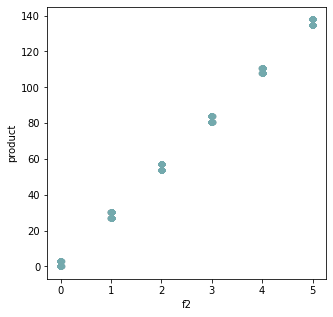

In [17]:
#диаграмма рассеивания f2  к product
data_1.plot( x='f2', y='product', kind='scatter', alpha=0.1,figsize=(5, 5), color='#73A9AD')

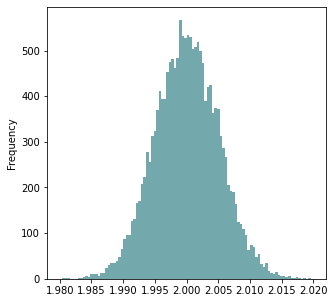

In [18]:
# теперь глянем в близи одной точки
data_1['f2'].plot(kind='hist', figsize=(5, 5), color='#73A9AD', range=(1.98, 2.02), bins=100)

В итоге все прояснилось.  Если в data_0, data_2  признак f2 имеем нормальное распределение, то в data_1  имеем 6 шт очень узких нормальных распределений, которые "порождают"   всего 12шт  уник значений таргета.  Почему такие данные  , сложно сказать.     
Как это повлияет на ML пока не ясно на данном этапе. Но в любом случае что то сделать с данными невозможно.

### Подготовка данных к ML
Для каждого набора данных:    
Откинем лишние  признаки (ID не понадобится в ML).  
Разобьем датасеты на фьючи и таргет.   
Разобьем выборки на тренир и валидационную.
Проведем масштабирование.
Категориальных переменных здесь нет, OHE не  понадобится.


In [19]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [20]:
# дропаем колонку с id
data_0 = data_0.drop(columns='id')
data_1 = data_1.drop(columns='id')
data_2 = data_2.drop(columns='id')

In [21]:
# разбиваем на фьючи и таргет

features_0 = data_0.drop(columns='product')
target_0 = data_0['product']

features_1 = data_1.drop(columns='product')
target_1 = data_1['product']

features_2 = data_2.drop(columns='product')
target_2 = data_2['product']

#разбиваем на трен и валид



In [22]:
#разбиваем на трен и валид

features_0_train, features_0_valid, target_0_train , target_0_valid = \
                                    train_test_split(features_0 ,target_0, test_size=0.25, random_state=333)

features_1_train, features_1_valid, target_1_train , target_1_valid = \
                                    train_test_split(features_1 ,target_1, test_size=0.25, random_state=333)

features_2_train, features_2_valid, target_2_train , target_2_valid = \
                                    train_test_split(features_2 ,target_2, test_size=0.25, random_state=333)

#првоерим размерности
print ('features_0_train.shape=' ,features_0_train.shape)
print ('features_0_valid.shape=' ,features_0_valid.shape)

features_0_train.shape= (75000, 3)
features_0_valid.shape= (25000, 3)


In [23]:
#масштабирование
# создаём скелер ,  в датасетах все признаки численные 
scaler = StandardScaler()
scaler_features = features_0.select_dtypes(exclude='object').columns.to_list()
# обучаем скелер на численных признаках тренировочной выборки
scaler.fit(features_0_train)

#масштабируем все выборки
features_0_train[scaler_features] = scaler.transform(features_0_train[scaler_features])
features_0_valid[scaler_features] = scaler.transform(features_0_valid[scaler_features])

#повторяем для данных _1
scaler = StandardScaler()
scaler.fit(features_1_train)
features_1_train[scaler_features] = scaler.transform(features_1_train[scaler_features])
features_1_valid[scaler_features] = scaler.transform(features_1_valid[scaler_features])

#повторяем для данных _2
scaler = StandardScaler()
scaler.fit(features_2_train)
features_2_train[scaler_features] = scaler.transform(features_2_train[scaler_features])
features_2_valid[scaler_features] = scaler.transform(features_2_valid[scaler_features])

# проверяем
features_1_train.head()

,f0,f1,f2
9428,-1.909812,-0.156743,1.466282
78798,-1.040373,1.090883,-0.878989
98024,0.312766,0.348320,0.877821
71098,-0.894723,0.120802,-0.296121
64564,-0.357926,-0.926255,0.879970


**Вывод** данные готовы к ML,выборки разбиты, выполнено масштабирвоание.

## Обучение и проверка модели

In [24]:
# обучение моделей
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

model_0.fit(features_0_train, target_0_train)
model_1.fit(features_1_train, target_1_train)
model_2.fit(features_2_train, target_2_train)

LinearRegression()

In [25]:
#получение предсказаний на валидац выборке
predict_0_valid = model_0.predict(features_0_valid)
predict_1_valid = model_1.predict(features_1_valid)
predict_2_valid = model_2.predict(features_2_valid)

In [26]:
#средний запас предсказанного сырья 

predict_0_mean = predict_0_valid.mean()
predict_1_mean = predict_1_valid.mean()
predict_2_mean = predict_2_valid.mean()

#и RMSE моделей
rmse_0 = mean_squared_error(target_0_valid, predict_0_valid)**0.5
rmse_1 = mean_squared_error(target_1_valid, predict_1_valid)**0.5
rmse_2 = mean_squared_error(target_2_valid, predict_2_valid)**0.5

print ('Средний запас предск. сырья первого региона = ',predict_0_mean,',  rmse=',rmse_0 )
print ('Средний запас предск. сырья второго региона = ', predict_1_mean,',   rmse=',rmse_1  )
print ('Средний запас предск. сырья третьего региона = ', predict_2_mean,', rmse=',rmse_2  )



Средний запас предск. сырья первого региона =  92.25413811475417 ,  rmse= 37.596877500413
Средний запас предск. сырья второго региона =  68.4687776046565 ,   rmse= 0.8847944517244745
Средний запас предск. сырья третьего региона =  95.12352664262353 , rmse= 39.844211967707004


**Вывод** во втором регионе предсказания получились очень точные, из за осбоенностей данных.

## Подготовка к расчёту прибыли

Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [27]:
# все ключевые значения для расчетов

INVESTMENT = 10_000_000_000    #инвестиции в разработку
NUMBER_OF_WELL = 200   # кол-во скважин в разработку
INCOME_ONE_RESOURCE = 450_000  # доход с одного ресурса (1000 баралей нефти)

In [28]:
#200 скважин под разработку , 450 к руб c единицы сырья,  и должно быть больше 10 ккк руб

# средний достаточный обьем сюрья для без убыточной разработки скважины
payback_mean = INVESTMENT /NUMBER_OF_WELL/ INCOME_ONE_RESOURCE

print ('средний достаточный обьем сырья для без убыточной разработки скважины' , payback_mean)
print ('средний запас в первом регионе' ,target_0.mean())
print ('средний запас в 2м регионе' ,target_1.mean())
print ('средний запас в 3м регионе' ,target_2.mean())

средний достаточный обьем сырья для без убыточной разработки скважины 111.11111111111111
средний запас в первом регионе 92.50000000000001
средний запас в 2м регионе 68.82500000000002
средний запас в 3м регионе 95.00000000000004


**Вывод** Как видно потенциальные регионы это первый и третий. Там средние запас сырья близок к с среднедостаточному для без убыточной добычи.   
Интересно, что средний запас реальный(таргет) и предсказанный почти равны.

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 4.1. Выберите скважины с максимальными значениями предсказаний. 
 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 4.3. Рассчитайте прибыль для полученного объёма сырья.

In [29]:
# функция расчета прибыли передаем в нее предсказания  и таргет

# а возвращает она прибыль с топ 200 скважин по предсказаниям  ,но по таргет данных
def profit (target_valid, predict_valid):
    
    #для удобство в сериес превратим
    predict_valid =  pd.Series(predict_valid)
    
    # выбираем макс топ 200 скважин по сырью на предсказаниях и сохряняем их индекс(для читаемости кода)
    index_top200 = predict_valid.sort_values(ascending=False).head(NUMBER_OF_WELL).index
    
    # считаем прибыль по этим 200 строкам по таргету
    profit = target_valid.reset_index(drop=True)[index_top200].sum()*INCOME_ONE_RESOURCE - INVESTMENT
    
    return profit

In [30]:
#протестим функцию
#profit(target_2_valid , predict_2_valid.sample(500))/10**9


## Посчитайте риски и прибыль для каждого региона:
 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [31]:
#функ пвседорандома
state = RandomState(12345) 

#Создадим дф для записи результатов
colum_res = ['Сред_прибыль /млрд','0.975 вквантиль/млрд','0.025 квантиль','Риск_убыт/%' ]
index_res = ['region_0','region_1', 'region_2']
results_df = pd.DataFrame(columns=colum_res, index=index_res)
#results_df

### Регион первый , расчет с применением Bootstrap

In [32]:
#первый регион
#переменная для записи выручки, она временная
profit_value= []
#для удобство в сериес превратим
predict_0_valid =  pd.Series(predict_0_valid)
#задаем цикл
for i in range(1000):
    
    #рандом выбираем 500 шт скважин из predict
    subsample = predict_0_valid.sample(500, replace=True, random_state=state)
           
    #добавляем расчет выручки, с пом. функции
    profit_value.append(profit(target_0_valid,subsample))
    

profit_value = pd.Series(profit_value)

print('Средняя прибыль первого региона = ',round ((profit_value.mean() / INVESTMENT ) , 3) ,'млрд. руб')
print('0,975 кванитиль= ', round(profit_value.quantile(0.95)/ INVESTMENT, 3 ), 'млрд. руб' )
print('0.025 квантиль= ', round(profit_value.quantile(0.05)/ INVESTMENT, 3 ), 'млрд. руб' )
print('Риск убытков= ', profit_value[profit_value < 0].count() / profit_value.count() * 100, '%' )

#запись в дф
results_df.loc[index_res[0], colum_res[0]] = round ((profit_value.mean() / 10**9 ) , 3)
results_df.loc[index_res[0], colum_res[1]] = round(profit_value.quantile(0.975)/ 10**9 , 3 )
results_df.loc[index_res[0], colum_res[2]] = round(profit_value.quantile(0.025)/ 10**9 , 3 )
results_df.loc[index_res[0], colum_res[3]] = profit_value[profit_value < 0].count() / profit_value.count() * 100


Средняя прибыль первого региона =  0.04 млрд. руб
0,975 кванитиль=  0.08 млрд. руб
0.025 квантиль=  -0.005 млрд. руб
Риск убытков=  7.5 %


### Регион второй , расчет с применением Bootstrap

In [33]:
#переменная для записи выручки, она временная
profit_value= []

#для удобство в сериес превратим
predict_1_valid =  pd.Series(predict_1_valid)
#задаем цикл
for i in range(1000):
    
    #рандом выбираем 500 шт скважин из predict
    subsample = predict_1_valid.sample(500, replace=True, random_state=state)
      
    #добавляем расчет выручки, с пом. функции
    profit_value.append(profit(target_1_valid, subsample))

profit_value = pd.Series(profit_value)

print('Средняя прибыль второго региона = ',round ((profit_value.mean() / INVESTMENT ) , 3) ,'млрд. руб')
print('0,975 кванитиль= ', round(profit_value.quantile(0.95)/ INVESTMENT, 3 ), 'млрд. руб' )
print('0.025 квантиль= ', round(profit_value.quantile(0.05)/ INVESTMENT, 3 ), 'млрд. руб' )
print('Риск убытков= ', profit_value[profit_value < 0].count() / profit_value.count() * 100, '%' )

#запись в дф
results_df.loc[index_res[1], colum_res[0]] = round ((profit_value.mean() / 10**9 ) , 3)
results_df.loc[index_res[1], colum_res[1]] = round(profit_value.quantile(0.95)/ 10**9 , 3 )
results_df.loc[index_res[1], colum_res[2]] = round(profit_value.quantile(0.05)/ 10**9 , 3 )
results_df.loc[index_res[1], colum_res[3]] = profit_value[profit_value < 0].count() / profit_value.count() * 100



Средняя прибыль второго региона =  0.042 млрд. руб
0,975 кванитиль=  0.076 млрд. руб
0.025 квантиль=  0.008 млрд. руб
Риск убытков=  1.7000000000000002 %


### Регион третий, расчет с применением Bootstrap

In [34]:
#переменная для записи выручки, она временная
profit_value= []

#для удобство в сериес превратим
predict_2_valid =  pd.Series(predict_2_valid)
#задаем цикл
for i in range(1000):
    
    #рандом выбираем 500 шт скважин из predict
    subsample = predict_2_valid.sample(500, replace=True, random_state=state)
      
    #добавляем расчет выручки, с пом. функции
    profit_value.append(profit(target_2_valid, subsample))

profit_value = pd.Series(profit_value)

print('Средняя прибыль третьего региона = ',round ((profit_value.mean() / INVESTMENT ) , 3) ,'млрд. руб')
print('0,975 кванитиль= ', round(profit_value.quantile(0.95)/ INVESTMENT, 3 ), 'млрд. руб' )
print('0.025 квантиль= ', round(profit_value.quantile(0.05)/ INVESTMENT, 3 ), 'млрд. руб' )
print('Риск убытков= ', profit_value[profit_value < 0].count() / profit_value.count() * 100, '%' )

#запись в дф
results_df.loc[index_res[2], colum_res[0]] = round ((profit_value.mean() / INVESTMENT ) , 3)
results_df.loc[index_res[2], colum_res[1]] = round(profit_value.quantile(0.95)/ INVESTMENT , 3 )
results_df.loc[index_res[2], colum_res[2]] = round(profit_value.quantile(0.05)/ INVESTMENT , 3 )
results_df.loc[index_res[2], colum_res[3]] = profit_value[profit_value < 0].count() / profit_value.count() * 100

Средняя прибыль третьего региона =  0.036 млрд. руб
0,975 кванитиль=  0.081 млрд. руб
0.025 квантиль=  -0.009 млрд. руб
Риск убытков=  10.2 %


### Смотрим результаты

In [35]:
results_df

,Сред_прибыль /млрд,0.975 вквантиль/млрд,0.025 квантиль,Риск_убыт/%
region_0,0.396,0.863,-0.132,7.5
region_1,0.416,0.759,0.082,1.7
region_2,0.036,0.081,-0.009,10.2


### Вывод по регионам   

Риск убытков меньше всего во второом регионе, та мже срднеяя прибыль самая хорошая.  Выбираем второй регион.

## Общий вывод.
 Данные были проанализированы. Данные со второго региона выглядят подозрительными.    
 Данные были подготовлены к ML(разбивка, масштабирвоание)      
 Обучена модель ЛинейнаяРегрессия и получены предсказания для каждого региона.    
 Проведены расчеты по прибыли, написана функция по расчету прибыли.  
 Методикой Bootstrap найдено распределение прибыли по регионам.   
 Выбран оптимальный ВТОРОЙ регион для разработки. Т к при небольших рисках, лучший показатель прибыльности.

## доп пункт сравним RMSE на CatBoost

In [37]:
#импорт
#instal catboost
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [38]:
%%time
# назначаем
cat_0 = CatBoostRegressor()
cat_1 = CatBoostRegressor()
cat_2 = CatBoostRegressor()

# обучение моделей , категориальных признаков нет, масштабир не нужно кэтбуст, но и не помешает, если сделано.
cat_0.fit(features_0_train, target_0_train,silent=True)
cat_1.fit(features_1_train, target_1_train,silent=True)
cat_2.fit(features_2_train, target_2_train,silent=True)

#получение предсказаний на валидац выборке
predict_0_cat = cat_0.predict(features_0_valid)
predict_1_cat = cat_1.predict(features_1_valid)
predict_2_cat = cat_2.predict(features_2_valid)

#и RMSE моделей смотрим

print ('cat_0 rmse=',mean_squared_error(target_0_valid, predict_0_cat)**0.5 )
print ('cat_1  rmse=',mean_squared_error(target_1_valid, predict_1_cat)**0.5  )
print (' cat_2 rmse=',mean_squared_error(target_2_valid, predict_2_cat)**0.5  )

print (' LinearRegression rmse_0=',rmse_0 )
print ('LinearRegression rmse_0=',rmse_1  )
print ('LinearRegression rmse_0=',rmse_2  )

cat_0 rmse= 37.08220061241541
cat_1  rmse= 1.8136629200805234
 cat_2 rmse= 37.355458608275484
 LinearRegression rmse_0= 37.596877500413
LinearRegression rmse_0= 0.8847944517244745
LinearRegression rmse_0= 39.844211967707004
CPU times: user 57.6 s, sys: 5.51 s, total: 1min 3s
Wall time: 42.5 s


**Вывод**  КэтБуст чуть полушче показал результат, кроме сомнительных данных со второго региона. Но ЛинРегг обучается моментально,а  кэт 33 сек. 